In [4]:
! pip install numpy
! pip install matplotlib==3.7.2
! pip install scikit-learn==1.2.0
! pip install tensorflow
! pip install opencv-python

  Using cached tensorflow-2.13.1-cp38-cp38-win_amd64.whl.metadata (2.6 kB)
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflow-2.13.0-cp38-cp38-win_amd64.whl.metadata (2.6 kB)
  Using cached tensorflow_intel-2.13.0-cp38-cp38-win_amd64.whl.metadata (4.1 kB)
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.10.0-cp38-cp38-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-16.0.6-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached numpy-1.24.3-cp38-cp38-win_amd64.whl (14.9 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached protobuf-4.25.1-cp38-cp38-win_

  You can safely remove it manually.


In [5]:
# Step 1: Import necessary libraries
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [6]:
# Step 2: Loading and preprocessing the data
def load_images(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith(".bmp"):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (480, 360))  # Reducing input size to 64x64 pixels
            images.append(img)
            labels.append(label)
    return images, labels

# Paths to your dataset folders
bikes_folder = 'dataset/bike'
cars_folder = 'dataset/cars'

bikes, bikes_labels = load_images(bikes_folder, 0)
cars, cars_labels = load_images(cars_folder, 1)

In [7]:
# Combining the both bike and car data
data = np.concatenate((bikes, cars))
labels = np.concatenate((bikes_labels, cars_labels))

# Converting labels to one-hot encoding
labels_one_hot = to_categorical(labels, num_classes=2)

In [8]:
# Spliting the data into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(data, labels_one_hot, test_size=0.2, random_state=42)

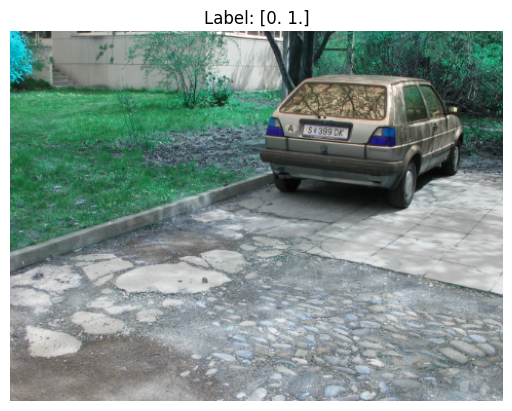

In [9]:
# Displaying a sample image
plt.imshow(Xtrain[0])
plt.title(f"Label: {ytrain[0]}")
plt.axis('off')
plt.show()